## 10.主成分分析

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
# 図やグラフを図示するためのライブラリインポート
# 日本語表示用ライブラリのインポート
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [ ]:
import sklearn #機械学習のライブラリインポート
from sklearn.decomposition import PCA #主成分分析器

データを読み込みます

In [ ]:
df_pca = pd.read_csv(("syuseibun.csv"),encoding = "shift-jis")

In [ ]:
df_pca.head()

,チャンネル名,ケーキ,カフェ,食レポ,スイーツ,食いしん坊,コンビニスイーツ,ファッション,スクールメイク,プチプラ,コスメ
0,チャンネル1,55,4,66,66,3,60,44,30,40,45
1,チャンネル2,2,0,40,25,50,55,0,0,0,0
2,チャンネル3,30,60,40,30,0,0,0,0,0,0
3,チャンネル4,30,59,3,44,0,3,20,1,2,44
4,チャンネル5,0,0,0,0,0,0,2,20,40,60


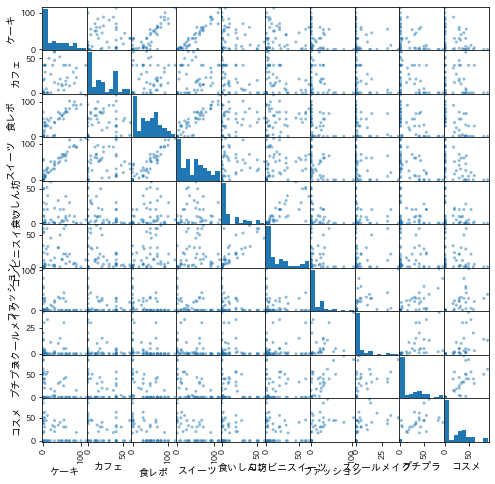

In [ ]:
from pandas import plotting 
# plotting.scatter_matrix(df_pca.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5)
from pandas import plotting 
plotting.scatter_matrix(df_pca.iloc[:, 1:], figsize=(8, 8), alpha=0.5)
plt.show()

In [ ]:
# 行列の標準化
df_pca_stand = df_pca.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_pca_stand.head(3)

,ケーキ,カフェ,食レポ,スイーツ,食いしん坊,コンビニスイーツ,ファッション,スクールメイク,プチプラ,コスメ
0,0.730517,-0.824120,0.675172,0.680464,-0.568751,2.171877,1.314706,2.588607,0.776056,0.960389
1,-0.928326,-1.037071,-0.098835,-0.524157,2.281066,1.920967,-0.623869,-0.520209,-0.779166,-0.875529
2,-0.051956,2.157193,-0.098835,-0.377252,-0.750654,-0.839043,-0.623869,-0.520209,-0.779166,-0.875529


In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(df_pca_stand)
# データを主成分空間に写像
feature = pca.transform(df_pca_stand)

In [ ]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(df_pca_stand.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.059752,1.037929,3.281462,-1.345759,-0.702272,0.558881,1.085325,0.602706,0.003692,-0.005901
1,-0.837499,3.354364,-1.030959,0.165872,0.056898,0.162140,0.079003,-0.182364,0.042608,-0.185159
2,-0.952280,-1.737664,-1.755337,-0.589728,-0.455065,0.662685,-0.185447,0.237100,-0.010275,-0.130298
3,0.384803,-1.852359,-1.311360,-0.810266,-1.075875,-0.351873,0.584331,-0.816635,-0.488922,0.043436
4,2.896199,-0.148181,-0.122281,-0.997403,1.589422,-0.594160,-0.059724,0.150631,0.135430,0.009475


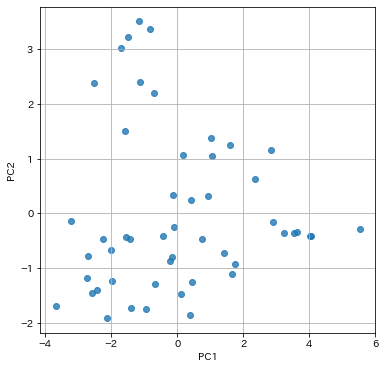

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df_pca_stand.columns))])

,0
PC1,0.472086
PC2,0.212715
PC3,0.138437
PC4,0.054656
PC5,0.049795
PC6,0.030128
PC7,0.015340
PC8,0.014318
PC9,0.009140
PC10,0.003386


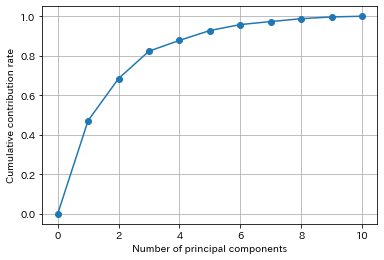

In [ ]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [ ]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(df_pca_stand.columns))])

,0
PC1,4.720861
PC2,2.127149
PC3,1.384371
PC4,0.546560
PC5,0.497945
PC6,0.301279
PC7,0.153401
PC8,0.143177
PC9,0.091397
PC10,0.033860


In [ ]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df_pca.columns[1:], index=["PC{}".format(x + 1) for x in range(len(df_pca_stand.columns))])

,ケーキ,カフェ,食レポ,スイーツ,食いしん坊,コンビニスイーツ,ファッション,スクールメイク,プチプラ,コスメ
PC1,-0.340668,-0.157116,-0.400958,-0.388064,-0.139218,-0.116152,0.344557,0.289168,0.401104,0.389620
PC2,-0.252560,-0.421955,-0.017219,-0.089777,0.610583,0.600922,-0.064939,0.062042,-0.000936,-0.088460
PC3,0.452019,-0.354245,0.342630,0.405082,-0.084285,0.110143,0.312388,0.427906,0.253881,0.155955
PC4,0.017224,-0.420758,0.070596,-0.022575,-0.018688,-0.188398,0.415606,-0.705553,0.226274,-0.244124
PC5,0.004090,-0.676407,-0.107237,-0.085147,-0.211588,-0.368155,-0.494561,0.190328,-0.206943,-0.140565
PC6,-0.141463,0.076452,0.005576,-0.147571,-0.143109,0.011549,0.419204,0.399409,-0.196191,-0.746975
PC7,-0.002662,-0.162198,-0.142589,0.001026,-0.555427,0.517413,0.181112,-0.178605,-0.506582,0.236240
PC8,-0.040420,0.057907,0.269086,-0.245377,-0.448469,0.381762,-0.377645,-0.052630,0.562458,-0.231916
PC9,-0.349777,-0.039155,0.782303,-0.317449,0.009187,-0.164206,0.093986,0.034565,-0.241106,0.261041
PC10,-0.686679,-0.013214,0.017006,0.697663,-0.159362,-0.041023,-0.046647,0.002737,0.105004,-0.031407


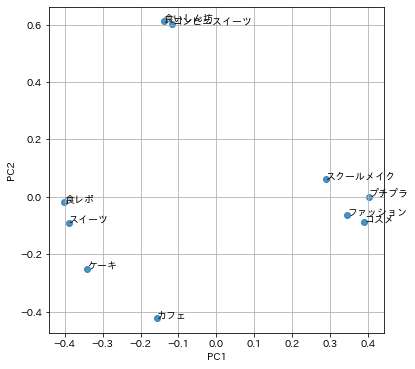

In [ ]:
# 第一主成分と第二主成分における観測変数の寄与度をプロット
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df_pca.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
list(df_pca.columns[1:])

['ケーキ',
 'カフェ',
 '食レポ',
 'スイーツ',
 '食いしん坊',
 'コンビニスイーツ',
 'ファッション',
 'スクールメイク',
 'プチプラ',
 'コスメ']

No handles with labels found to put in legend.


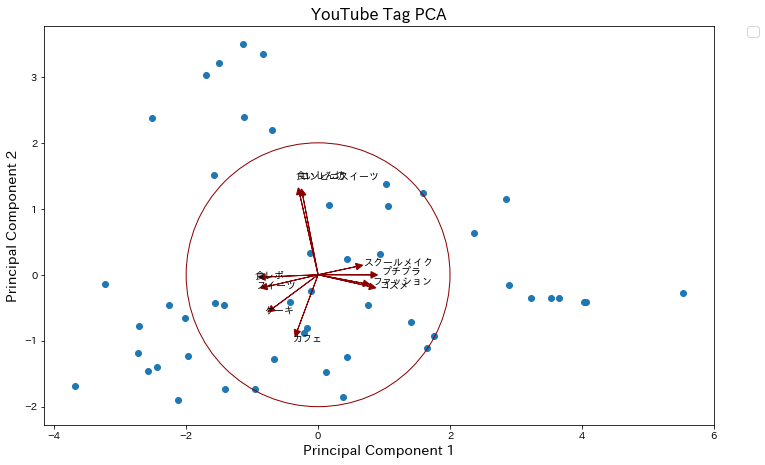

In [ ]:
import seaborn as sns
import matplotlib.patches as patches

# **************************
# 主成分得点プロット *******
# **************************
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(feature[:,0],feature[:,1])
ax.set_xlabel('Principal Component 1', size=14)
ax.set_ylabel('Principal Component 2', size=14)
ax.set_title('YouTube Tag PCA', size=16)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

# **************************
# 固有ベクトルを図示 *******
# **************************

pc1 = pca.components_[0]
pc2 = pca.components_[1]
arrow_magnification = 2 # 矢印の倍率
feature_names = list(df_pca.columns[1:])

# ガイド円
patch_circle = patches.Circle(
    xy=(0, 0), radius=1 * arrow_magnification,
    fc='white',
    ec='darkred',
    fill=False)

ax.add_patch(patch_circle)

# 矢印と変数ラベル
for i in range(len(feature_names)):
  # 矢印
  ax.arrow(0, 0,
           pc1[i] * arrow_magnification,
           pc2[i] * arrow_magnification,
           head_width=0.1,
           head_length=0.1,
          color='darkred')
  # 変数ラベル
  ax.text(pc1[i] * arrow_magnification * 1.2,
          pc2[i] * arrow_magnification * 1.2,
          feature_names[i])
plt.axis('scaled')
ax.set_aspect('equal')

plt.show()